In [59]:
import optuna
import Optimization as OP
import FrameworkLib as FL
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx   
import pickle

N_agents = 12
max_dist = 7
threshold = 1
box_margin = 10
Niter = 1000

In [60]:
# maximize coverage
alpha = 0 

sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
study_01 = optuna.create_study(
    directions=["maximize"],
    sampler=sampler,
    study_name="edge_relation",
    storage=None,
    load_if_exists=True,
)
study_01.optimize(OP.Objective(N_agents,max_dist,threshold,box_margin,alpha), n_trials=Niter, n_jobs=4, timeout=600)

[I 2025-02-18 16:56:32,537] A new study created in memory with name: edge_relation


[I 2025-02-18 16:56:32,586] Trial 0 finished with value: 35.57242926970217 and parameters: {'pos0': 6.93594247203157, 'pos1': 7.291662935173964, 'pos2': 0.5070562683243118, 'pos3': 2.9795564132019905, 'pos4': 9.866390766992183, 'pos5': 3.16841604779174, 'pos6': 5.291519285596906, 'pos7': 0.7155377084886583, 'pos8': 0.9538540559237729, 'pos9': 5.034081377456393, 'pos10': 9.738769567803656, 'pos11': 2.2871147060536448, 'pos12': 7.231062024453809, 'pos13': 0.5196358965019454, 'pos14': 2.924621929689817, 'pos15': 6.182811257134451, 'pos16': 3.479962281221076, 'pos17': 9.139052486678965, 'pos18': 7.932411831193532, 'pos19': 9.467398662575127, 'pos20': 4.570388997029236, 'pos21': 8.31233572230856, 'pos22': 0.15223787894033225, 'pos23': 7.635557122877538}. Best is trial 0 with value: 35.57242926970217.
[I 2025-02-18 16:56:32,587] Trial 2 finished with value: 31.139629980166724 and parameters: {'pos0': 3.6093181124833884, 'pos1': 5.768422486722605, 'pos2': 5.010418823463349, 'pos3': 8.42960918

In [61]:
best_trials = study_01.best_trials
trials = study_01.trials
params_array_01 = []
for trial in best_trials:    
    params_array_01.append(np.array([list(trial.params.values())]))    
params_array_01_mass = []
for trial in trials:    
    if trial.user_attrs['constraint'][1] < 0.0:
        params_array_01_mass.append(np.array([list(trial.params.values())]))

In [62]:
# maximize connectivity
alpha = 1

sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
study_02 = optuna.create_study(
    directions=["maximize"],
    sampler=sampler,
    study_name="edge_relation",
    storage=None,
    load_if_exists=True,
)
study_02.optimize(OP.Objective(N_agents,max_dist,threshold,box_margin,alpha), n_trials=Niter, n_jobs=8, timeout=600)

[I 2025-02-18 16:56:43,606] A new study created in memory with name: edge_relation
[I 2025-02-18 16:56:43,704] Trial 0 finished with value: 0.20444504226559013 and parameters: {'pos0': 3.8810519588361023, 'pos1': 6.737277336512502, 'pos2': 6.528223420861682, 'pos3': 2.8431964711735604, 'pos4': 3.4651226383150435, 'pos5': 9.600213469689926, 'pos6': 8.01373928926925, 'pos7': 9.175161717622677, 'pos8': 8.85339648407043, 'pos9': 0.81442689275811, 'pos10': 4.668213804080349, 'pos11': 1.1679779583324978, 'pos12': 2.5813412997606724, 'pos13': 3.2227045722221748, 'pos14': 5.746046756397502, 'pos15': 2.1276880472194524, 'pos16': 0.034868217951222746, 'pos17': 9.597897761616201, 'pos18': 9.059197486092728, 'pos19': 8.720398484452966, 'pos20': 9.74424513047818, 'pos21': 2.720221213163062, 'pos22': 9.86099088971032, 'pos23': 6.698644038929097}. Best is trial 0 with value: 0.20444504226559013.
[I 2025-02-18 16:56:43,756] Trial 1 finished with value: 0.3407417371093169 and parameters: {'pos0': 8.152

In [63]:
best_trials = study_02.best_trials
trials = study_02.trials
params_array_02 = []
for trial in best_trials:    
    params_array_02.append(np.array([list(trial.params.values())]))    
params_array_02_mass = []
for trial in trials:        
    if trial.user_attrs['constraint'][1] < 0.0:
        params_array_02_mass.append(np.array([list(trial.params.values())]))

Dimensions of params_array_01: (1, 1, 24)
Dimensions of params_array_02: (217, 1, 24)
Dimensions of params_array_01_mass: (910, 1, 24)
Dimensions of params_array_02_mass: (986, 1, 24)


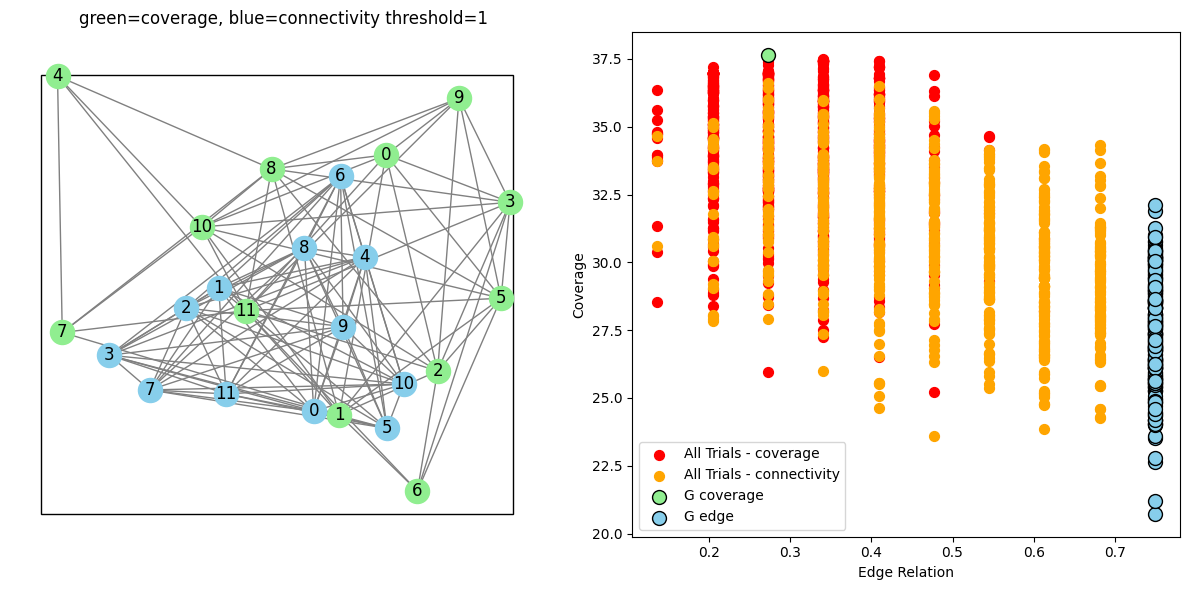

In [64]:
print("Dimensions of params_array_01:", np.array(params_array_01).shape)
print("Dimensions of params_array_02:", np.array(params_array_02).shape)
print("Dimensions of params_array_01_mass:", np.array(params_array_01_mass).shape)
print("Dimensions of params_array_02_mass:", np.array(params_array_02_mass).shape)

# Save variables to a file

variables_to_save = {
    'params_array_01': params_array_01,
    'params_array_02': params_array_02,
    'params_array_01_mass': params_array_01_mass,
    'params_array_02_mass': params_array_02_mass,
    'N_agents': N_agents,
    'box_margin': box_margin,
    'max_dist': max_dist,
    'Niter': Niter
}

name  = 'N_agents' + str(N_agents) + 'max_dist' + str(max_dist) + 'Niter' + str(Niter) + 'threshold' + str(threshold) + '.pkl'
with open('../../fig/results/' + str(name), 'wb') as f:
    pickle.dump(variables_to_save, f)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('green=coverage, blue=connectivity threshold=' + str(threshold))
ax2.set_xlabel('Edge Relation')
ax2.set_ylabel('Coverage')

# Draw the box_margin box in the first subplot
box = plt.Rectangle((0, 0), box_margin, box_margin, fill=True, edgecolor='black', linestyle='-', facecolor='white')
ax1.add_patch(box)

for pos in params_array_01_mass:  
    pos = np.asarray(pos) 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist)         
    ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='red', s=50)
ax2.scatter([], [], color='red', label='All Trials - coverage', s=50)

for pos in params_array_02_mass: 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist)           
    ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='orange', s=50)
ax2.scatter([], [], color='orange', label='All Trials - connectivity', s=50)

max_connectivity = float('-inf')
max_connectivity_graph = None
max_connectivity_pos = None

i = 0
for pos in params_array_01:
    i += 1
    pos = pos.reshape((N_agents, 2))
    G = FL.generate_graph(pos, max_dist)
    connectivity = FL.get_edge_relation(G)
    if connectivity > max_connectivity:
        max_connectivity = connectivity
        max_connectivity_graph = G
        max_connectivity_pos = pos
        max_connectivity_i = i    
        
i = 0
for pos in params_array_01:   
    i = i + 1
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist) 
    
    if i == max_connectivity_i:
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, node_color='lightgreen', edge_color='gray', ax=ax1)
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='lightgreen', label='G coverage', s=100,edgecolors='black')    
    else:
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='lightgreen', s=100, edgecolors='black')
 
 
max_coverage = float('-inf')
max_coverage_graph = None
max_coverage_pos = None

i = 0
for pos in params_array_02:
    i += 1
    pos = pos.reshape((N_agents, 2))
    G = FL.generate_graph(pos, max_dist)
    coverage = FL.get_coverage(G)
    if coverage > max_coverage:
        max_coverage = coverage
        max_coverage_graph = G
        max_coverage_pos = pos  
        max_coverage_i = i    

i = 0
for pos in params_array_02:   
    i = i + 1
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist) 
    
    if i == max_coverage_i:
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, node_color='skyblue', edge_color='gray', ax=ax1)
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='skyblue', label='G edge', s=100, edgecolors='black')
    else:
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='skyblue', s=100, edgecolors='black')

ax2.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# cycle over all params_array_01 and params_array_02 and save coverage, edge_relation, and EGV
coverage = []
edge_relation = []
EG4 = []
for pos in params_array_01_mass + params_array_02_mass:
    pos = pos.reshape((N_agents, 2))
    G = FL.generate_graph(pos, max_dist)        
    coverage.append(FL.get_coverage(G))
    edge_relation.append(FL.get_density(G))    
    rigid, EGVL = FL.is_rigid(G)
    EG4.append(np.real(EGVL))
        
X = np.array(coverage)
Y = np.array(edge_relation)
Z = np.array(EG4)

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=Z * 0.5,  # Increase marker size based on EG4 values
        color=Z,
        colorscale='Viridis',
        opacity=0.6  # Make markers slightly transparent
    )
)])

fig.update_layout(
    autosize=False,
    width=1200,
    height=800
)

# Set labels
fig.update_layout(
    scene=dict(
        xaxis_title='Coverage',
        yaxis_title='Edge Relation',
        zaxis_title='EG4'
    ),
    title='Interactive 3D Scatter Plot'
)

# Show the plot
fig.show()